<a href="https://colab.research.google.com/github/SarahFSBorges/data.science/blob/main/Limpeza_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este execício foi realizado com base no curso Data Science na Prática 3.0. 
https://escola.sigmoidal.ai/

In [2]:
#  importando pacotes
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configurando a visualização
sns.set_style()
%matplotlib inline

In [5]:
# importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv', sep=',')

# verificando as dimensões
print('Dimensões do dataset',
      '\nVariáveis: ', df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# verificando as primeiras entradas
df.head()

Dimensões do dataset 
Variáveis:  56 
Entradas:  344


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [6]:
# verificar final do dataset
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,...,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,...,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,...,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,...,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,...,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


In [7]:
# modificando o tipo
df.lesao_corp_morte[343].astype('int64')

1

In [8]:
# pandas usa floats quando tem dados ausentes
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [9]:
# mostrar quantidade de dados ausentes por variável
(df.isnull().sum()).sort_values(ascending=False)

furto_bicicleta               276
roubo_bicicleta               276
cmba                          180
posse_drogas                  180
trafico_drogas                180
apreensao_drogas_sem_autor    180
apf                           180
aaapai                        180
cmp                           180
furto_celular                 144
sequestro_relampago           144
extorsao                      144
furto_coletivo                144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estelionato                   144
pol_militares_mortos_serv     144
pol_civis_mortos_serv         144
estupro                       144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
registro_ocorrencias           96
lesao_corp_morte               96
sequestro                      96
ameaca                         96
lesao_corp_culposa             96
hom_culposo                    84
hom_por_interv

In [11]:
# dados ausentes por ano
df.set_index('vano').isna().sum(level=0)

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,
1991,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1992,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1993,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1994,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1995,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1996,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1997,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1998,0,0,12,0,0,0,0,12,0,12,...,12,0,12,12,12,0,0,0,12,0
1999,0,0,0,0,0,0,0,12,0,0,...,12,0,12,12,12,0,0,0,0,0


In [12]:
# visualizando dados específicos
df[273:300]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
273,2013,10,377,3.0,12,38.0,441,7508,520.0,184.0,...,497.0,41,5.0,2.0,1.0,430,6639,2639,68030.0,3
274,2013,11,414,2.0,13,31.0,420,7278,467.0,189.0,...,443.0,45,4.0,2.0,0.0,460,6370,2644,63796.0,3
275,2013,12,461,5.0,17,43.0,532,8207,408.0,195.0,...,483.0,41,6.0,0.0,0.0,526,6626,2893,65609.0,3
276,2014,1,464,3.0,15,50.0,557,9050,555.0,194.0,...,628.0,66,3.0,0.0,0.0,532,7760,3206,75403.0,3
277,2014,2,482,5.0,16,56.0,543,8093,555.0,166.0,...,520.0,63,3.0,1.0,0.0,559,7637,3025,69434.0,3
278,2014,3,510,5.0,10,46.0,544,8357,479.0,214.0,...,563.0,59,2.0,5.0,0.0,571,8208,2947,72915.0,3
279,2014,4,449,1.0,17,37.0,559,7484,469.0,194.0,...,532.0,41,3.0,1.0,0.0,504,7988,3073,67358.0,3
280,2014,5,444,3.0,8,53.0,505,6249,442.0,161.0,...,451.0,32,3.0,2.0,0.0,508,8177,3073,66175.0,3
281,2014,6,377,1.0,18,45.0,503,7229,429.0,185.0,...,447.0,25,3.0,2.0,0.0,441,7897,2635,65397.0,3
282,2014,7,370,4.0,14,57.0,439,6070,442.0,156.0,...,429.0,38,2.0,2.0,0.0,445,8435,2479,67615.0,3


Dados do Airbnb - NYC


In [16]:
# importando os dados
df_nyc = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/eds_outliers/master/nyc.csv', index_col=0)

# verificando as dimensões
print('Dimensões do dataset',
      '\nVariáveis: ', df_nyc.shape[1], "\n"
      'Entradas: ', df_nyc.shape[0])

# verificando as primeiras entradas
df.head()

Dimensões do dataset 
Variáveis:  16 
Entradas:  49530


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.37,2,335
2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,322,2020-06-07,4.64,1,276
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365


In [17]:
# verificando o tipo
df_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [19]:
# transformando as colunas
df_nyc[['price','latitude','longitude']] = df_nyc[['price','latitude','longitude']].astype('object')

# verificando o resultado
df_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                           object
longitude                          object
room_type                          object
price                              object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [20]:
# ver variáveis
df_nyc.describe()

,id,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.953000e+04,4.953000e+04,49530.000000,49530.000000,38211.000000,49530.000000,49530.000000
mean,2.295964e+07,8.509951e+07,8.191540,23.867515,1.008095,6.233030,126.666848
std,1.352683e+07,9.887597e+07,21.974833,48.245823,1.345213,25.485293,142.381428
min,2.060000e+03,2.259000e+03,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.085050e+07,9.269052e+06,2.000000,1.000000,0.150000,1.000000,0.000000
50%,2.233602e+07,3.800483e+07,3.000000,5.000000,0.450000,1.000000,79.000000
75%,3.557779e+07,1.373589e+08,6.000000,23.000000,1.420000,2.000000,267.000000
max,4.370336e+07,3.490826e+08,1250.000000,746.000000,53.800000,280.000000,365.000000


In [21]:
# verificando dados ausentes
(df_nyc.isnull().sum()).sort_values(ascending=False)

last_review                       11319
reviews_per_month                 11319
name                                 18
host_name                             6
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [22]:
# excluindo colunas com dados faltantes
df_nyc.drop(columns=['reviews_per_month', 'last_review'],inplace=True)

# excluindo entradas com dados faltantes
df_nyc.dropna(axis=0,inplace=True)

# convertendo os tipos de dados
df_nyc[['price','latitude','longitude']] = df_nyc[['price','latitude','longitude']].astype('float')

In [23]:
# verificando o resultado
df_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [24]:
# verificando a distribuição estatística
df_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.950600e+04,4.950600e+04,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000
mean,2.296530e+07,8.511890e+07,40.729232,-73.951041,162.656648,8.174040,23.877954,6.235466,126.695390
std,1.352568e+07,9.889048e+07,0.054673,0.047553,419.408789,21.522983,48.255027,25.491224,142.381721
min,2.060000e+03,2.259000e+03,40.499790,-74.240840,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.087581e+07,9.268318e+06,40.689810,-73.983360,68.000000,2.000000,1.000000,1.000000,0.000000
50%,2.233894e+07,3.801608e+07,40.723840,-73.955355,101.000000,3.000000,5.000000,1.000000,79.000000
75%,3.557870e+07,1.373589e+08,40.762790,-73.934290,175.000000,6.000000,23.000000,2.000000,267.000000
max,4.370336e+07,3.490826e+08,40.911690,-73.712990,10000.000000,1250.000000,746.000000,280.000000,365.000000


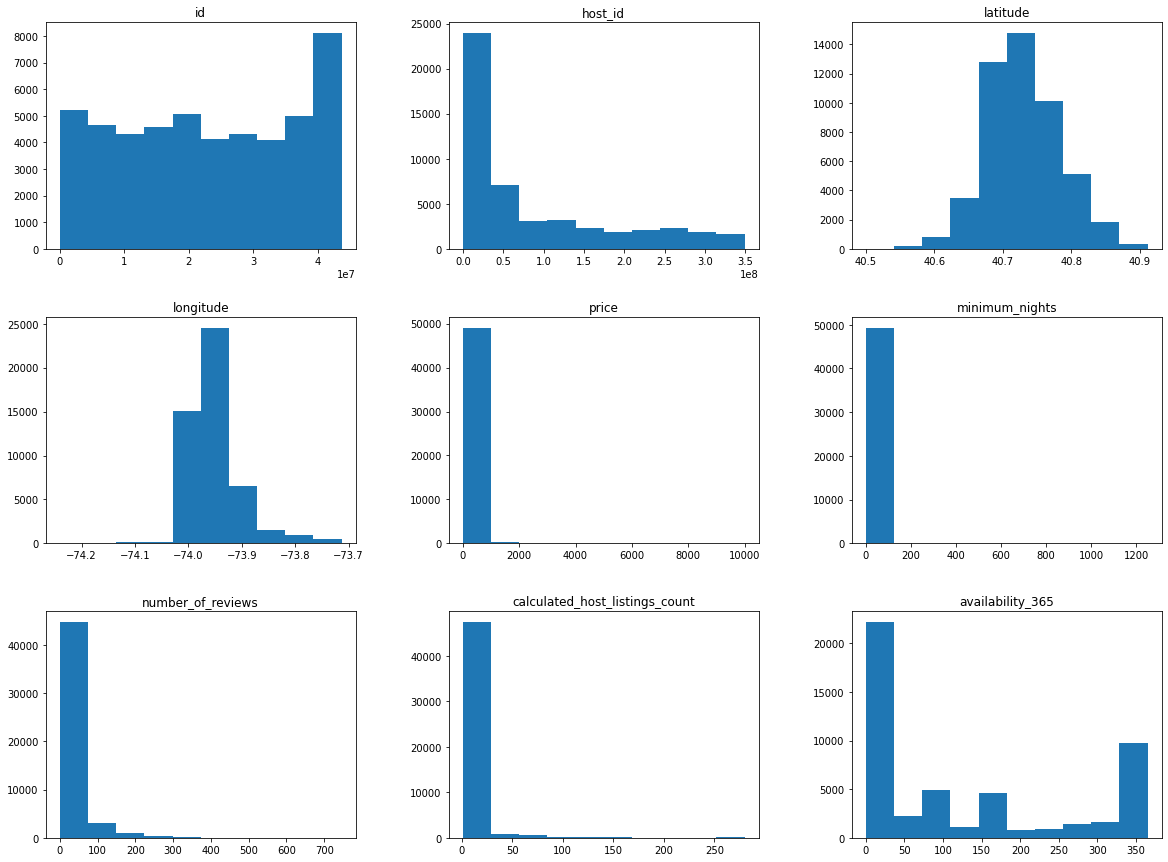

In [25]:
# verificando as distribuições
df_nyc.hist(figsize=(20,15), grid=False);

In [29]:
# identificando os outliers para a variável price
q1_price = df_nyc.price.quantile(.25)
q3_price = df_nyc.price.quantile(.75)
IQR_price = q3_price - ql_price
print('IQR da Variável price: ', IQR_price)

# definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da Variável price:  107.0
Limite superior de price:  335.5
Limite inferior de price:  -92.5


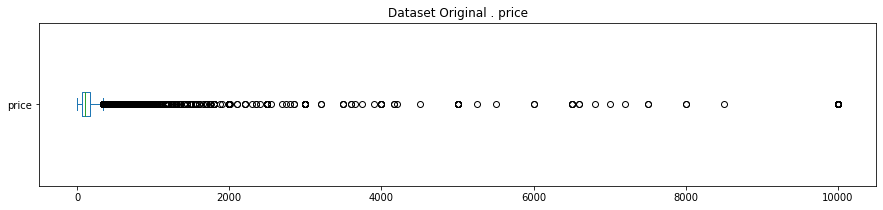

O dataset possui 49506 colunas
2913 Entradas acima de 335.5
Representam 5.88% do dataset


In [33]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_nyc.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original . price')
plt.show()
print("O dataset possui {} colunas".format(df_nyc.shape[0]))
print("{} Entradas acima de 335.5".format(len(df_nyc[df_nyc.price > 335.5])))
print("Representam {:.2f}% do dataset".format((len(df_nyc[df_nyc.price > 335.5]) / df_nyc.shape[0])*100))


In [34]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_nyc.minimum_nights.quantile(.25)
q3_minimum_nights = df_nyc.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da Variável minimum_nights: ', IQR_price)

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da Variável minimum_nights:  107.0
Limite superior de minimum_nights:  12.0
Limite inferior de minimum_nights:  -4.0


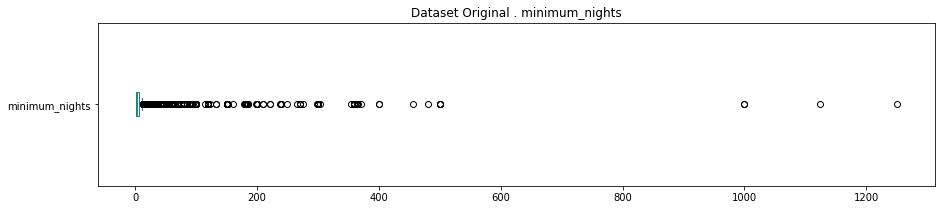

O dataset possui 49506 colunas
58 Entradas acima de 335.5
Representam 0.12% do dataset


In [35]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_nyc.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original . minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df_nyc.shape[0]))
print("{} Entradas acima de 335.5".format(len(df_nyc[df_nyc.minimum_nights > 335.5])))
print("Representam {:.2f}% do dataset".format((len(df_nyc[df_nyc.minimum_nights > 335.5]) / df_nyc.shape[0])*100))


In [40]:
# limpando o dataset
df_clean = df_nyc.copy()

df_clean.drop(df_clean.price[df_clean.price > 335.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 4].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df_nyc.shape)
print('Sahpe após a limpeza: ', df_clean.shape)

Shape antes da limpeza:  (49506, 14)
Sahpe após a limpeza:  (31868, 14)


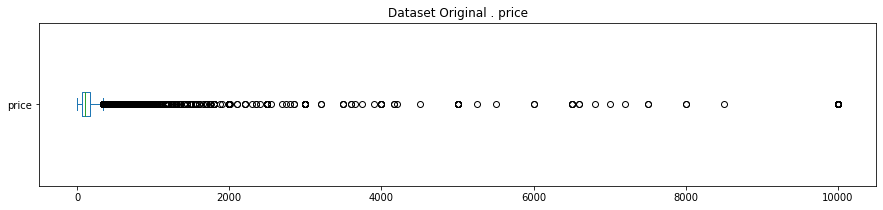

O dataset possui 49506 colunas
2913 Entradas acima de 335.5
Representam 5.88% do dataset


In [42]:
# plotando novamente o boxplot 
fig, ax = plt.subplots(figsize=(15,3))
df_nyc.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original . price')
plt.show()
print("O dataset possui {} colunas".format(df_nyc.shape[0]))
print("{} Entradas acima de 335.5".format(len(df_nyc[df_nyc.price > 335.5])))
print("Representam {:.2f}% do dataset".format((len(df_nyc[df_nyc.price > 335.5]) / df_nyc.shape[0])*100))

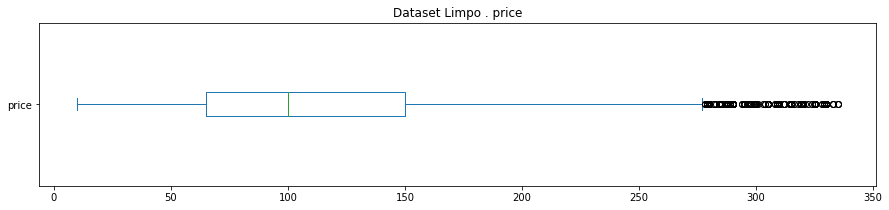

Tamanho original: 49506 colunas
Tamanho atual:31868 colunas


In [43]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo . price')
plt.show()
print("Tamanho original: {} colunas".format(df_nyc.shape[0]))
print("Tamanho atual:{} colunas".format(df_clean.shape[0]))

In [44]:
# verificando as distribuições
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3.186800e+04,3.186800e+04,31868.000000,31868.000000,31868.000000,31868.000000,31868.000000,31868.000000,31868.000000
mean,2.251385e+07,8.530676e+07,40.727484,-73.946198,116.769832,2.049611,29.791295,2.016694,111.793304
std,1.312168e+07,9.774259e+07,0.057190,0.050780,66.044427,0.979063,54.355872,3.402586,136.028780
min,2.060000e+03,2.259000e+03,40.499790,-74.240840,10.000000,1.000000,0.000000,1.000000,0.000000
25%,1.080725e+07,1.008776e+07,40.687150,-73.980730,65.000000,1.000000,1.000000,1.000000,0.000000
50%,2.196350e+07,3.949284e+07,40.720160,-73.952040,100.000000,2.000000,7.000000,1.000000,42.000000
75%,3.459590e+07,1.387822e+08,40.762810,-73.928078,150.000000,3.000000,33.000000,2.000000,180.000000
max,4.370336e+07,3.490786e+08,40.910550,-73.712990,335.000000,4.000000,746.000000,83.000000,365.000000


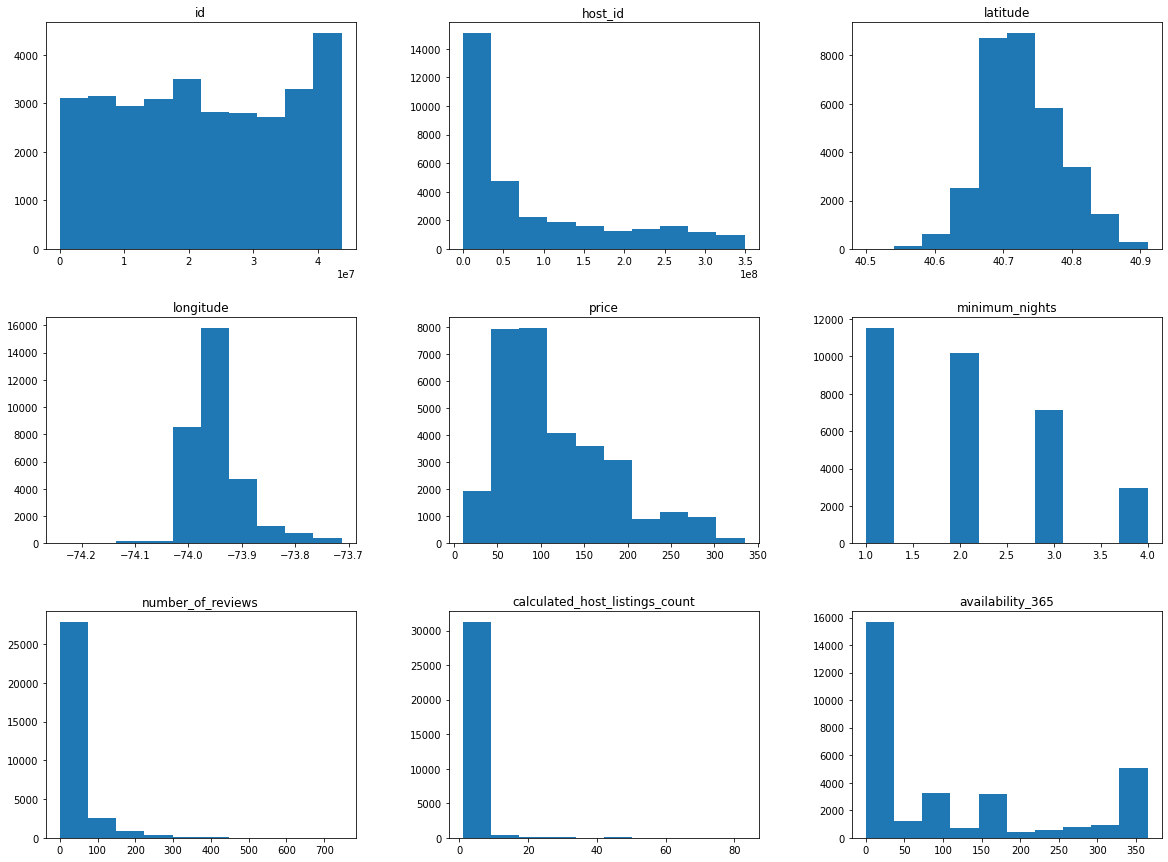

In [46]:
# verificando a distribuição estatística dos dados limpos
df_clean.hist(figsize=(20,15),grid=False);